<a href="https://colab.research.google.com/github/SquareRoot49/Pytorch_Learning/blob/main/Pytorch01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
## Data preparing and loading

In [ ]:
weight = 0.7
bias = 0.3

In [ ]:
# create
starts = 0
end = 1
step = 0.02
X = torch.arange(starts, end, step)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [ ]:
X = X.unsqueeze(dim = 1)

In [ ]:
y = bias + weight * X

In [ ]:
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [ ]:
## Split the data

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
## Visualize the data

In [ ]:
def plot_predictions(train_data = X_train, train_t = y_train, test_data = X_test, test_t = y_test, predictions = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_t, c = 'b', s = 4, label = 'training data')
  plt.scatter(test_data, test_t, c = 'g', s = 4, label = 'testing data')
  if prediction != None:
    plt.scatter(test_data, prdictions, c = 'y', label = 'predictions')
  plt.legend(prop = {'size': 14});

In [ ]:
def plot_prediction(train_data = X_train, train_t = y_train, test_data = X_test, test_t = y_test, prediction = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_t, c = 'b', s = 4, label = 'training data')
  plt.scatter(test_data, test_t, c = 'g', s = 4, label = 'testing data')

  if prediction != None:
    plt.scatter(test_data, prediction, c = 'y', label = 'predictions')
  plt.legend(prop = {'size': 14});

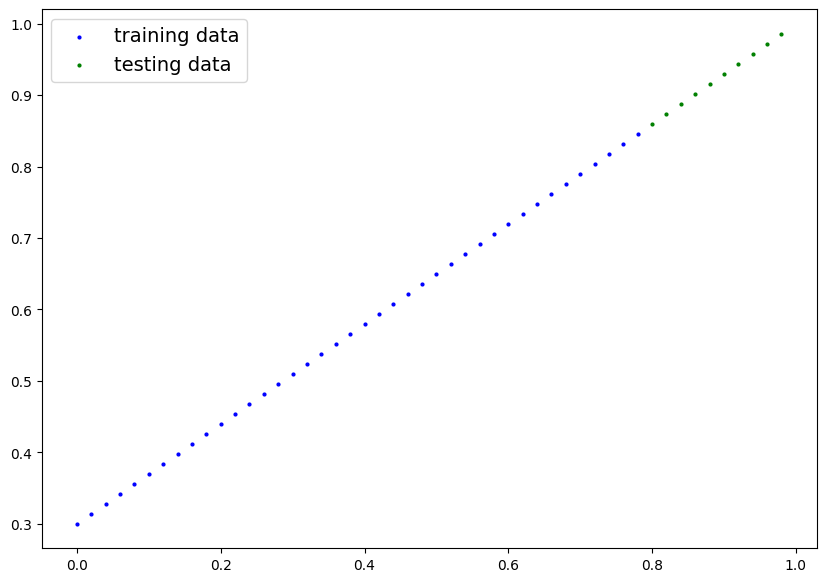

In [ ]:
plot_prediction()

## Build model!
# First linear regression model.

In [ ]:
class LinearRegressionModel(nn.Module):# the LinearRegressionModel class is the children class of nn.Model class
  def __init__(self):
    super().__init__() #inherit the attributes of parent class nn.Model
    self.weight = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


In [ ]:
x = torch.rand(1)

In [ ]:
torch.rand([2, 3])

tensor([[0.6898, 0.0688, 0.1930],
        [0.5257, 0.8903, 0.6791]])

In [ ]:
x.dtype

torch.float32

In [ ]:
# Checking the contents of the model

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

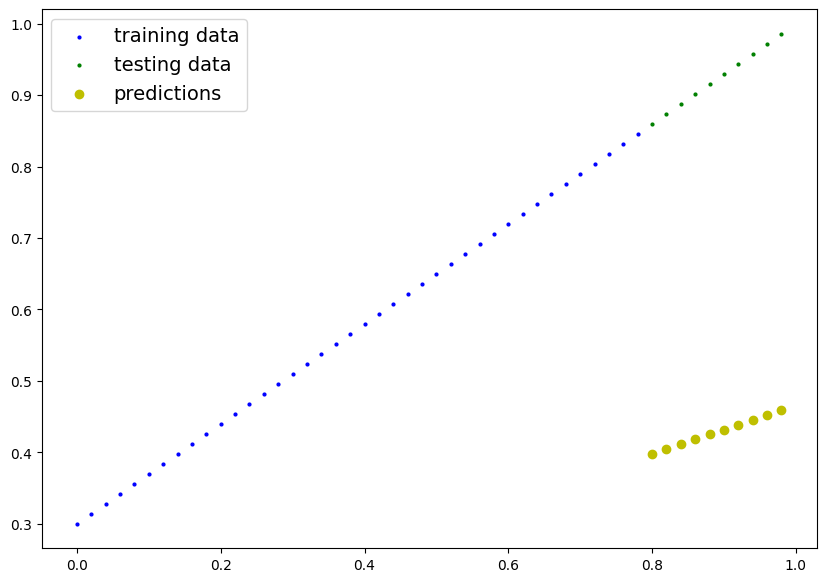

In [ ]:
plot_prediction(prediction = y_preds)

In [ ]:
loss_fn = nn.L1Loss()

In [ ]:
loss_fn

L1Loss()

In [ ]:
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
# epoch is a loop for data
epochs = 1000

for epoch in range(epochs):
  model_0.train()

  y_preds = model_0(X_train)

  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()
  model_0.eval()

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
y_preds_2 = model_0(X_test)
y_preds_2

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], grad_fn=<AddBackward0>)

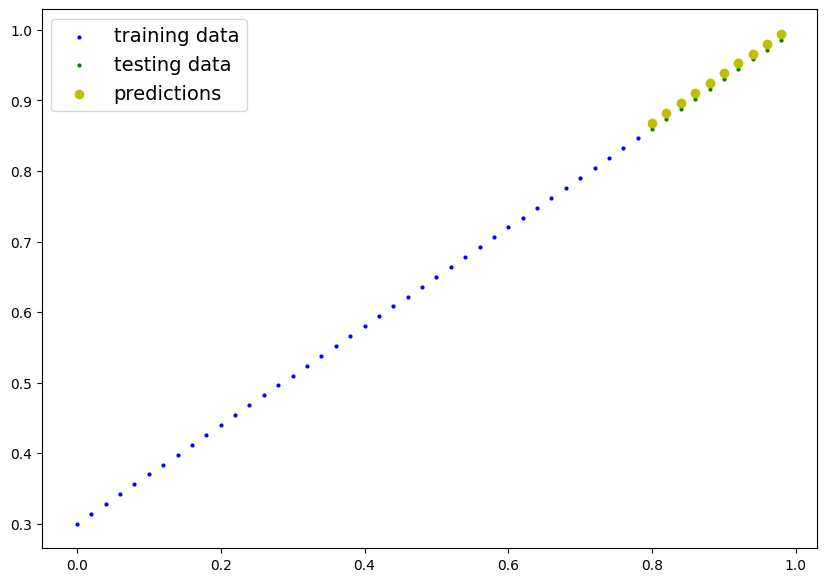

In [ ]:
with torch.no_grad():
    y_preds_2 = model_0(X_test)
    plot_prediction(prediction=y_preds_2)

In [ ]:
class LinearRegressionModel(nn.Module):# the LinearRegressionModel class is the children class of nn.Model class
  def __init__(self):
    super().__init__() #inherit the attributes of parent class nn.Model
    self.weight = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
epochs = 1

for epoch in range(epochs):
  model_0.train() # put the model in the training model

  y_pred = model_0(X_test) # through the model_0, do the forward coputation

  loss = loss_fn(y_pred, y_test) # compute the loss function
  print(f'Loss: {loss}')

  optimizer.zero_grad() # the gradients will accumulate every loop, so we need to zero them

  loss.backward() # perform the backpopagation

  optimizer.step() # substitute the parameters

  model_0.eval()


Loss: 0.4945361614227295


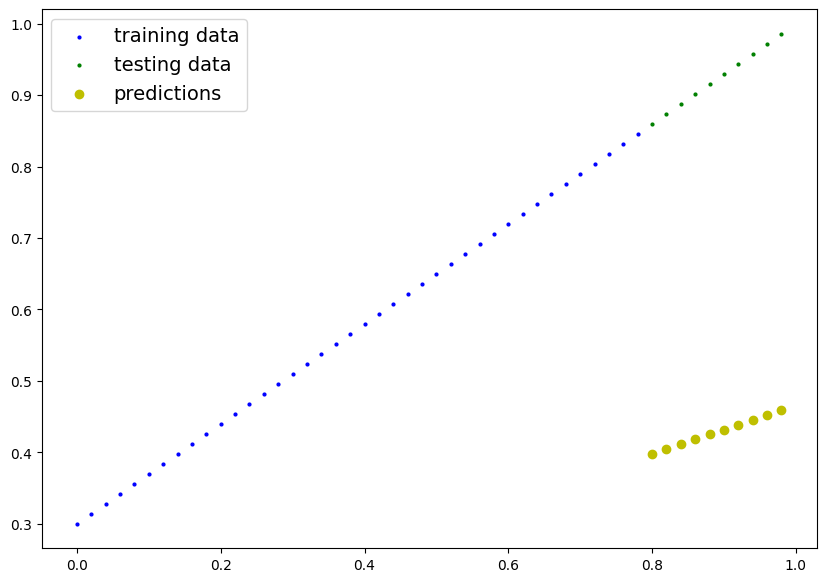

In [ ]:
with torch.no_grad():
    y_preds_new = model_0(X_test)
    plot_prediction(prediction=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Saving a model in pytorch
# Three main methods

In [ ]:
class LinearRegressionModel_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
  def forward(self, x):
    return self.bias + self.weight * x


In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModel_2()

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
y_train.shape, X_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

In [ ]:
y_pred = model_1(X_train)
y_pred.shape

torch.Size([40, 1])

In [ ]:
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
epochs = 1000

epoch_record = []
loss_record = []
test_record = []

for epoch in range(epochs):

  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.no_grad():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_record.append(epoch)
    loss_record.append(loss)
    test_record.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
type(loss_record[0])

torch.Tensor

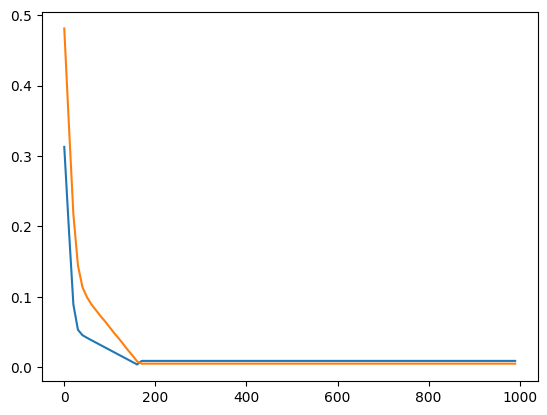

In [ ]:
import numpy as np
plt.plot(epoch_record, np.array(torch.tensor(loss_record).numpy()), label = 'Train loss')
plt.plot(epoch_record, np.array(torch.tensor(test_record).numpy()), label = 'Test loss')

In [ ]:
# Saving the model
from pathlib import Path

In [ ]:
model_path = Path('models')
model_path.mkdir(parents = True, exist_ok = True)

In [ ]:
model_name = 'Pytorch01_workflow_model_1.pth'
model_save_path = model_path/model_name

In [ ]:
torch.save(obj = model_1.state_dict(), f = model_save_path)

In [ ]:
# Loading a pytorch model

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model = LinearRegressionModel_2()
loaded_model.load_state_dict(torch.load(f = model_save_path))

<ipython-input-54-eb9fe8a96852>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:

with torch.inference_mode():
  new_preds = loaded_model(X_test)
new_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

# Put all the things together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda


In [ ]:
# Create some data

In [ ]:
weight = 0.7
bias = 0.3

In [ ]:
start = 0
end = 1
step = 0.02

In [ ]:
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = bias + weight * X

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)  # 输出: torch.Size([2, 3])

# 在第 1 维增加一个新维度
x_unsqueezed = x.unsqueeze(dim=1)
print(x_unsqueezed)  # 输出: torch.Size([2, 1, 3])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[[1, 2, 3]],

        [[4, 5, 6]]])


In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_prediction(train_data, train_t, test_data, test_t, prediction = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_t, c = 'b', s = 4, label = 'training data')
  plt.scatter(test_data, test_t, c = 'g', s = 4, label = 'testing data')

  if prediction != None:
    plt.scatter(test_data, prediction, c = 'y', label = 'predictions')
  plt.legend(prop = {'size': 14});

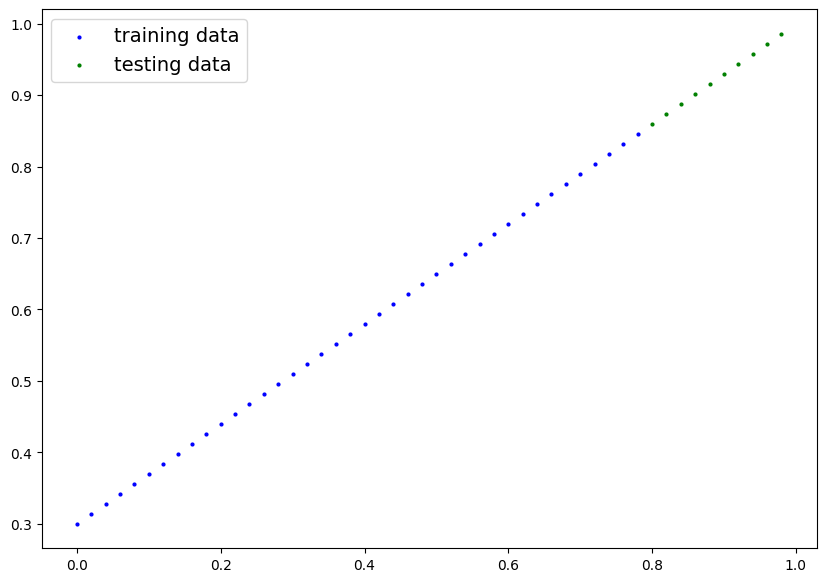

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModel_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self, x):
    return self.linear_layer(x)


In [ ]:
torch.manual_seed(42)
model_new = LinearRegressionModel_2()

In [ ]:
model_new.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
next(model_new.parameters()).device

device(type='cpu')

In [ ]:
model_new.to(device)

LinearRegressionModel_2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_new.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()

opotimizer = torch.optim.SGD(params = model_new.parameters(), lr = 0.01)